In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

%matplotlib inline
# sns.set(rc={'figure.figsize': [18, 18]}, font_scale=1.4)

In [18]:
df=pd.read_csv('./COLD,FLU,ALLERGY,COVIDcsv.csv')

In [19]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
44448    False
44449    False
44450    False
44451    False
44452    False
Length: 44453, dtype: bool

In [20]:
df.duplicated().value_counts()

False    44453
dtype: int64

In [21]:
print(f'duplicated when TYPE is droped:')
df.drop(columns=['TYPE'], axis=1).duplicated().value_counts()
# df

duplicated when TYPE is droped:


False    41489
True      2964
dtype: int64

In [22]:
cols = df.iloc[:, :-1].columns
cols

Index(['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE',
       'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
       'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
       'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE'],
      dtype='object')

In [23]:
df2 = df.drop_duplicates(subset=cols)
df2

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44447,1,1,1,1,1,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,FLU
44449,1,1,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,0,FLU
44450,0,0,1,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,1,0,FLU
44451,0,0,0,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,FLU


In [24]:
for col in cols:
    print(f'duplicated when {col} droped:')
    print(df2.drop(columns=col).duplicated().value_counts())
    print("")

duplicated when COUGH droped:
False    22145
True     19344
dtype: int64

duplicated when MUSCLE_ACHES droped:
False    22140
True     19349
dtype: int64

duplicated when TIREDNESS droped:
False    22119
True     19370
dtype: int64

duplicated when SORE_THROAT droped:
False    22118
True     19371
dtype: int64

duplicated when RUNNY_NOSE droped:
False    24112
True     17377
dtype: int64

duplicated when STUFFY_NOSE droped:
False    24095
True     17394
dtype: int64

duplicated when FEVER droped:
False    30417
True     11072
dtype: int64

duplicated when NAUSEA droped:
False    30806
True     10683
dtype: int64

duplicated when VOMITING droped:
False    30811
True     10678
dtype: int64

duplicated when DIARRHEA droped:
False    30801
True     10688
dtype: int64

duplicated when SHORTNESS_OF_BREATH droped:
False    30816
True     10673
dtype: int64

duplicated when DIFFICULTY_BREATHING droped:
False    30824
True     10665
dtype: int64

duplicated when LOSS_OF_TASTE droped:
False    2

In [25]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [27]:
train = []
val = []
nDepth=np.arange(1,30)

for max_d in nDepth:
  model = RandomForestClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  
  score_train = model.score(X_train, y_train)
  score_val = model.score(X_val,y_val)

  train.append(score_train)
  val.append(score_val)

  # print(f'The Training Accuracy for max_depth {max_d} is: {score_train}')
  # print(f'The Validation Accuracy for max_depth {max_d} is: {score_val}')
  # print('')

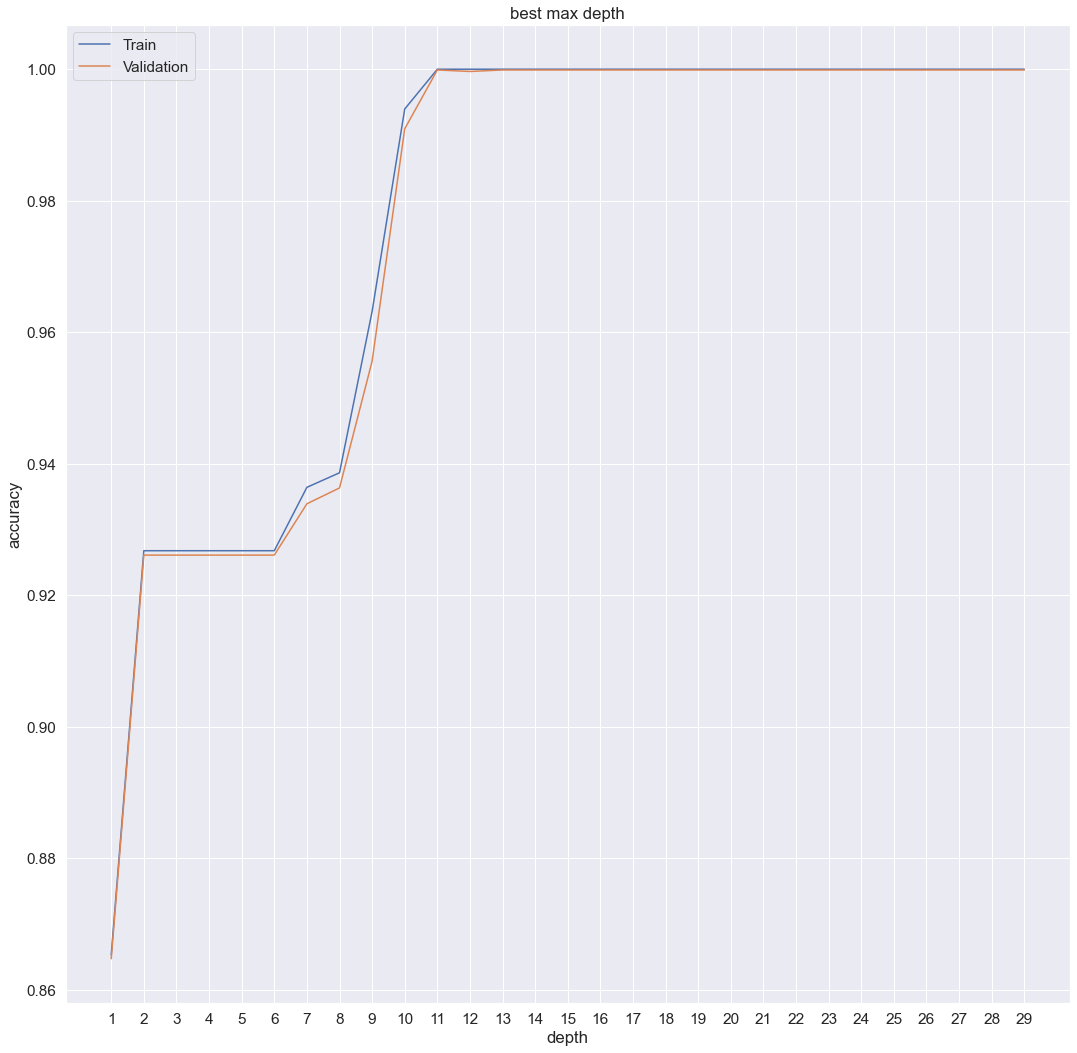

In [28]:
plt.plot(nDepth,train,label='Train')
plt.plot(nDepth,val,label='Validation')

plt.title("best max depth")
plt.xlabel("depth")
plt.ylabel("accuracy")

plt.xticks(np.arange(min(nDepth), max(nDepth)+1, 1))

plt.legend()
plt.show()

In [29]:
clf = RandomForestClassifier(max_depth=12)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)*100

99.9839318711336

In [30]:
print(max(train))
print(max(val))

1.0
0.9998852289682084


In [31]:
print(min(train))
print(min(val))

0.8652663682424123
0.8646849535177321


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
train = []
test = []
nDepth=np.arange(1,30)

for max_d in nDepth:
  model = RandomForestClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  
  score_train = model.score(X_train, y_train)
  score_val = model.score(X_test,y_test)

  train.append(score_train)
  test.append(score_val)

  # print(f'The Training Accuracy for max_depth {max_d} is: {score_train}')
  # print(f'The Validation Accuracy for max_depth {max_d} is: {score_val}')
  # print('')

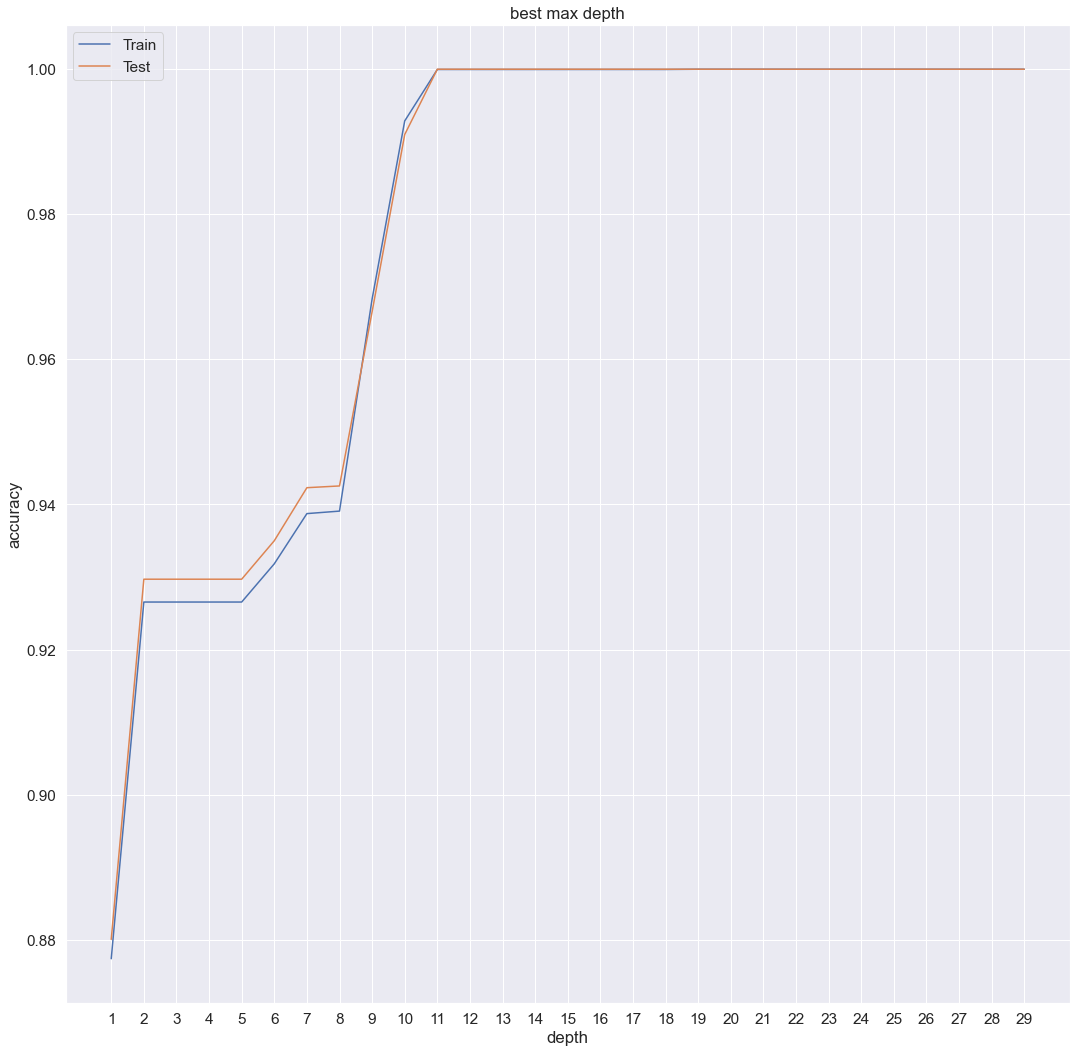

In [35]:
plt.plot(nDepth,train,label='Train')
plt.plot(nDepth,test,label='Test')

plt.title("best max depth")
plt.xlabel("depth")
plt.ylabel("accuracy")

plt.xticks(np.arange(min(nDepth), max(nDepth)+1, 1))

plt.legend()
plt.show()

In [36]:
print(max(train))
print(max(test))

1.0
1.0


In [37]:
print(min(train))
print(min(test))

0.8773844776530542
0.8800514180123724


In [61]:
df2

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44447,1,1,1,1,1,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,FLU
44449,1,1,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,0,FLU
44450,0,0,1,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,1,0,FLU
44451,0,0,0,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,FLU


In [62]:
df2['TYPE'].value_counts()

FLU        22611
ALLERGY    16381
COVID       1984
COLD         513
Name: TYPE, dtype: int64

In [63]:
flu = df2[df2['TYPE'] == 'FLU']
cold = df2[df2['TYPE'] == 'COLD']
covid = df2[df2['TYPE'] == 'COVID']
allergy = df2[df2['TYPE'] == 'ALLERGY']


In [65]:
flu

Index(['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE',
       'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
       'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
       'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE', 'TYPE'],
      dtype='object')

In [66]:
cold

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
16381,0,1,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,COLD
16382,1,1,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,COLD
16385,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,COLD
16386,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,COLD
16389,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,COLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17397,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,COLD
17399,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,COLD
17400,0,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,COLD
17401,0,1,1,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,COLD


In [67]:
covid

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
17405,1,1,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,COVID
17406,0,1,0,1,0,0,1,0,1,1,...,1,0,0,0,0,0,0,1,0,COVID
17407,1,0,0,1,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,COVID
17408,1,1,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,COVID
17409,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,COVID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19448,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,COVID
19449,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,COVID
19450,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,COVID
19451,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,COVID


In [68]:
allergy

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,ALLERGY
16377,0,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,1,ALLERGY
16378,1,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,1,ALLERGY
16379,0,0,0,1,1,1,0,0,0,0,...,0,0,1,1,1,1,0,1,0,ALLERGY


In [43]:
cols = df2.columns
cold_zero_cols = [] 

for col in cols:
    print(col)
    print(cold[col].value_counts())
    print("")
    print("")

    test = cold[col].value_counts()
    if(test.size == 1 and test.index == 0):
        cold_zero_cols.append(col)


COUGH
0    257
1    256
Name: COUGH, dtype: int64


MUSCLE_ACHES
1    257
0    256
Name: MUSCLE_ACHES, dtype: int64


TIREDNESS
1    257
0    256
Name: TIREDNESS, dtype: int64


SORE_THROAT
1    257
0    256
Name: SORE_THROAT, dtype: int64


RUNNY_NOSE
0    257
1    256
Name: RUNNY_NOSE, dtype: int64


STUFFY_NOSE
0    257
1    256
Name: STUFFY_NOSE, dtype: int64


FEVER
1    512
0      1
Name: FEVER, dtype: int64


NAUSEA
0    513
Name: NAUSEA, dtype: int64


VOMITING
0    513
Name: VOMITING, dtype: int64


DIARRHEA
0    513
Name: DIARRHEA, dtype: int64


SHORTNESS_OF_BREATH
0    513
Name: SHORTNESS_OF_BREATH, dtype: int64


DIFFICULTY_BREATHING
0    513
Name: DIFFICULTY_BREATHING, dtype: int64


LOSS_OF_TASTE
0    257
1    256
Name: LOSS_OF_TASTE, dtype: int64


LOSS_OF_SMELL
1    257
0    256
Name: LOSS_OF_SMELL, dtype: int64


ITCHY_NOSE
0    513
Name: ITCHY_NOSE, dtype: int64


ITCHY_EYES
0    513
Name: ITCHY_EYES, dtype: int64


ITCHY_MOUTH
0    513
Name: ITCHY_MOUTH, dtype: int6

In [69]:
cold_zero_cols

['NAUSEA',
 'VOMITING',
 'DIARRHEA',
 'SHORTNESS_OF_BREATH',
 'DIFFICULTY_BREATHING',
 'ITCHY_NOSE',
 'ITCHY_EYES',
 'ITCHY_MOUTH',
 'ITCHY_INNER_EAR',
 'PINK_EYE']

In [44]:
cols = df.columns
flu_zero_cols = [] 

for col in cols:
    print(col)
    print(flu[col].value_counts())
    print("")
    print("")

    test = flu[col].value_counts()
    if(test.size == 1 and test.index == 0):
        flu_zero_cols.append(col)


COUGH
1    12172
0    10439
Name: COUGH, dtype: int64


MUSCLE_ACHES
1    12120
0    10491
Name: MUSCLE_ACHES, dtype: int64


TIREDNESS
1    12140
0    10471
Name: TIREDNESS, dtype: int64


SORE_THROAT
1    12119
0    10492
Name: SORE_THROAT, dtype: int64


RUNNY_NOSE
1    13099
0     9512
Name: RUNNY_NOSE, dtype: int64


STUFFY_NOSE
1    13078
0     9533
Name: STUFFY_NOSE, dtype: int64


FEVER
1    11709
0    10902
Name: FEVER, dtype: int64


NAUSEA
1    12385
0    10226
Name: NAUSEA, dtype: int64


VOMITING
1    12387
0    10224
Name: VOMITING, dtype: int64


DIARRHEA
1    12344
0    10267
Name: DIARRHEA, dtype: int64


SHORTNESS_OF_BREATH
1    12366
0    10245
Name: SHORTNESS_OF_BREATH, dtype: int64


DIFFICULTY_BREATHING
1    12392
0    10219
Name: DIFFICULTY_BREATHING, dtype: int64


LOSS_OF_TASTE
0    12628
1     9983
Name: LOSS_OF_TASTE, dtype: int64


LOSS_OF_SMELL
0    12621
1     9990
Name: LOSS_OF_SMELL, dtype: int64


ITCHY_NOSE
0    22611
Name: ITCHY_NOSE, dtype: int64


I

In [71]:
flu_zero_cols

['ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'PINK_EYE']

In [75]:
cols = df.columns
allergy_zero_cols = [] 

for col in cols:
    print(col)
    print(allergy[col].value_counts())
    print("")
    print("")

    test = allergy[col].value_counts()
    if(test.size == 1 and test.index == 0):
        allergy_zero_cols.append(col)

COUGH
1    8191
0    8190
Name: COUGH, dtype: int64


MUSCLE_ACHES
1    8191
0    8190
Name: MUSCLE_ACHES, dtype: int64


TIREDNESS
0    8191
1    8190
Name: TIREDNESS, dtype: int64


SORE_THROAT
0    8192
1    8189
Name: SORE_THROAT, dtype: int64


RUNNY_NOSE
1    8192
0    8189
Name: RUNNY_NOSE, dtype: int64


STUFFY_NOSE
1    8192
0    8189
Name: STUFFY_NOSE, dtype: int64


FEVER
0    16381
Name: FEVER, dtype: int64


NAUSEA
0    16381
Name: NAUSEA, dtype: int64


VOMITING
0    16381
Name: VOMITING, dtype: int64


DIARRHEA
0    16381
Name: DIARRHEA, dtype: int64


SHORTNESS_OF_BREATH
0    16381
Name: SHORTNESS_OF_BREATH, dtype: int64


DIFFICULTY_BREATHING
0    16381
Name: DIFFICULTY_BREATHING, dtype: int64


LOSS_OF_TASTE
1    8191
0    8190
Name: LOSS_OF_TASTE, dtype: int64


LOSS_OF_SMELL
0    8191
1    8190
Name: LOSS_OF_SMELL, dtype: int64


ITCHY_NOSE
1    8192
0    8189
Name: ITCHY_NOSE, dtype: int64


ITCHY_EYES
1    8192
0    8189
Name: ITCHY_EYES, dtype: int64


ITCHY_MOUT

In [76]:
allergy_zero_cols

['FEVER',
 'NAUSEA',
 'VOMITING',
 'DIARRHEA',
 'SHORTNESS_OF_BREATH',
 'DIFFICULTY_BREATHING']

In [104]:
cols = df.columns
covid_zero_cols = [] 

for col in cols:
    print(col)
    print(covid[col].value_counts())
    print("")
    print("")

    test = covid[col].value_counts()
    if(test.size == 1 and test.index == 0):
        covid_zero_cols.append(col)
covid_zero_cols

COUGH
1    992
0    992
Name: COUGH, dtype: int64


MUSCLE_ACHES
1    992
0    992
Name: MUSCLE_ACHES, dtype: int64


TIREDNESS
0    992
1    992
Name: TIREDNESS, dtype: int64


SORE_THROAT
1    992
0    992
Name: SORE_THROAT, dtype: int64


RUNNY_NOSE
0    1984
Name: RUNNY_NOSE, dtype: int64


STUFFY_NOSE
0    1984
Name: STUFFY_NOSE, dtype: int64


FEVER
1    992
0    992
Name: FEVER, dtype: int64


NAUSEA
1    1024
0     960
Name: NAUSEA, dtype: int64


VOMITING
1    1024
0     960
Name: VOMITING, dtype: int64


DIARRHEA
1    1024
0     960
Name: DIARRHEA, dtype: int64


SHORTNESS_OF_BREATH
1    1024
0     960
Name: SHORTNESS_OF_BREATH, dtype: int64


DIFFICULTY_BREATHING
1    1024
0     960
Name: DIFFICULTY_BREATHING, dtype: int64


LOSS_OF_TASTE
0    1984
Name: LOSS_OF_TASTE, dtype: int64


LOSS_OF_SMELL
0    1984
Name: LOSS_OF_SMELL, dtype: int64


ITCHY_NOSE
0    1984
Name: ITCHY_NOSE, dtype: int64


ITCHY_EYES
0    1984
Name: ITCHY_EYES, dtype: int64


ITCHY_MOUTH
0    1984
Name

['RUNNY_NOSE',
 'STUFFY_NOSE',
 'LOSS_OF_TASTE',
 'LOSS_OF_SMELL',
 'ITCHY_NOSE',
 'ITCHY_EYES',
 'ITCHY_MOUTH',
 'ITCHY_INNER_EAR',
 'PINK_EYE']

In [105]:
covid_zero_cols

['RUNNY_NOSE',
 'STUFFY_NOSE',
 'LOSS_OF_TASTE',
 'LOSS_OF_SMELL',
 'ITCHY_NOSE',
 'ITCHY_EYES',
 'ITCHY_MOUTH',
 'ITCHY_INNER_EAR',
 'PINK_EYE']

In [110]:
print(df.columns)

Index(['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE',
       'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
       'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
       'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE', 'TYPE'],
      dtype='object')


In [108]:
print("flu: " ,flu_zero_cols)
print("")
print("cold: ",cold_zero_cols)
print("")
print("fever: ",allergy_zero_cols)
print("")
print("covid: ",covid_zero_cols)

flu:  ['ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'PINK_EYE']

cold:  ['NAUSEA', 'VOMITING', 'DIARRHEA', 'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'PINK_EYE']

fever:  ['FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA', 'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING']

covid:  ['RUNNY_NOSE', 'STUFFY_NOSE', 'LOSS_OF_TASTE', 'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH', 'ITCHY_INNER_EAR', 'PINK_EYE']


In [82]:
zero_cols = set(flu_zero_cols).intersection(cold_zero_cols).intersection(allergy_zero_cols)
zero_cols 

set()

In [90]:
# flu_cold = flu. (cold)
# flu_cold_allergy = flu_cold.append(allergy)
# flu_cold_allergy 

# new_df = pd.concat(cold,allergy)
# new_df

df_merged = pd.concat([cold, flu, allergy], ignore_index=True, sort=False)
df_merged

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,1,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,COLD
1,1,1,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,COLD
2,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,COLD
3,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,COLD
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,COLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39500,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,ALLERGY
39501,0,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,1,ALLERGY
39502,1,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,1,ALLERGY
39503,0,0,0,1,1,1,0,0,0,0,...,0,0,1,1,1,1,0,1,0,ALLERGY


In [91]:
df_merged = df_merged.drop(zero_cols, axis=1)
df_merged


,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,1,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,COLD
1,1,1,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,COLD
2,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,COLD
3,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,COLD
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,COLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39500,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,ALLERGY
39501,0,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,1,ALLERGY
39502,1,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,1,ALLERGY
39503,0,0,0,1,1,1,0,0,0,0,...,0,0,1,1,1,1,0,1,0,ALLERGY


In [92]:
# flu_cold = flu_cold.drop(['index'], axis=1)
# flu_cold

In [96]:
# df_merged = df_merged.sample(frac=1, ignore_index=False)
df_merged = df_merged.sample(frac=1, ignore_index=True)
df_merged

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,1,0,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,FLU
1,1,1,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,FLU
2,1,0,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,FLU
3,1,0,0,1,0,1,1,1,0,0,...,0,1,0,0,0,0,0,1,0,FLU
4,0,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,ALLERGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39500,0,1,1,1,1,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,ALLERGY
39501,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,ALLERGY
39502,1,1,1,1,1,0,0,0,0,0,...,0,1,0,0,0,1,1,1,1,ALLERGY
39503,0,0,1,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,FLU


In [97]:
# flu_cold = flu_cold.reset_index().drop(['index'], axis=1)
# flu_cold

In [98]:
X = df_merged.iloc[:, :-1]
y = df_merged.iloc[:, -1]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
train = []
test = []
nDepth=np.arange(1,30)

for max_d in nDepth:
  model = RandomForestClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  
  score_train = model.score(X_train, y_train)
  score_val = model.score(X_test,y_test)

  train.append(score_train)
  test.append(score_val)

  # print(f'The Training Accuracy for max_depth {max_d} is: {score_train}')
  # print(f'The Validation Accuracy for max_depth {max_d} is: {score_val}')
  # print('')

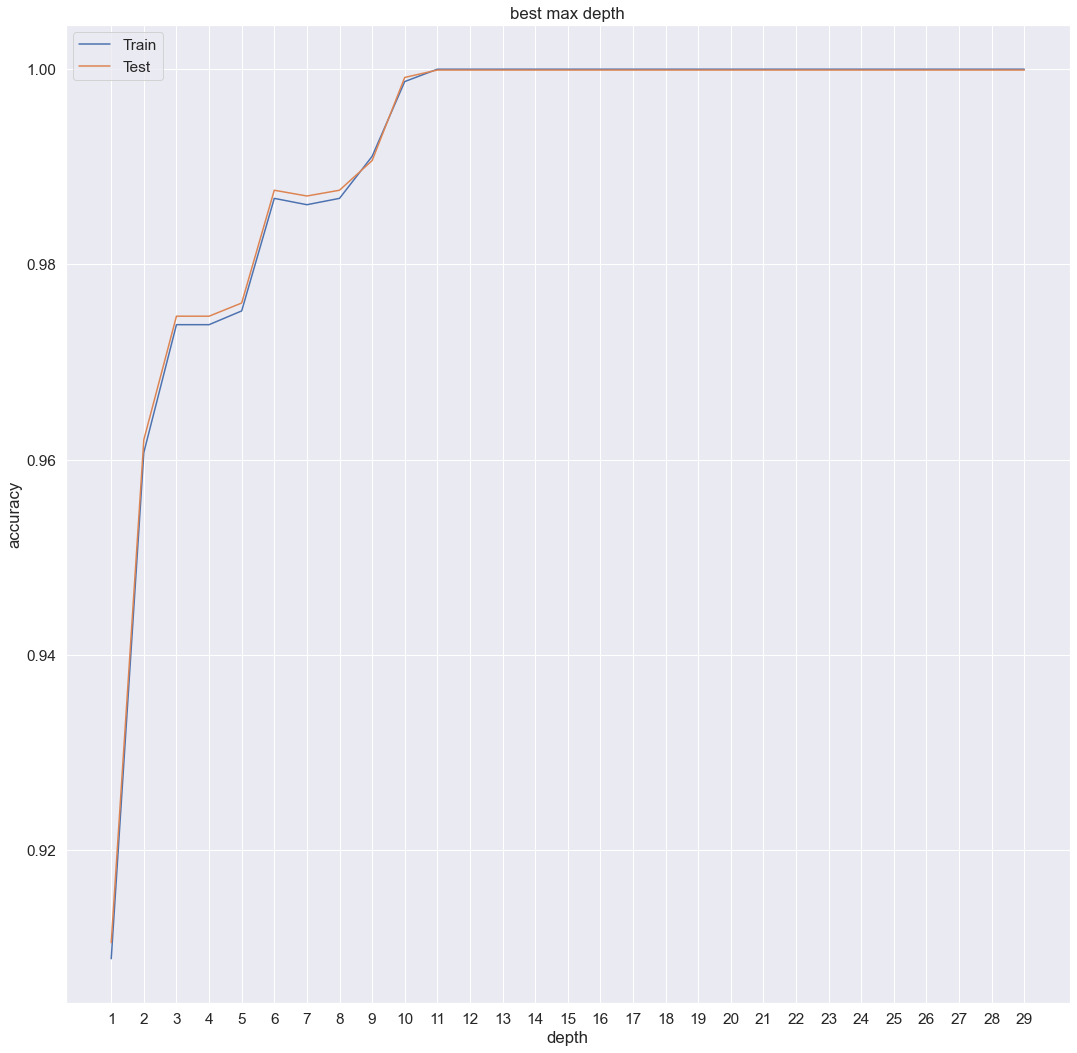

In [103]:
plt.plot(nDepth,train,label='Train')
plt.plot(nDepth,test,label='Test')

plt.title("best max depth")
plt.xlabel("depth")
plt.ylabel("accuracy")

plt.xticks(np.arange(min(nDepth), max(nDepth)+1, 1))

plt.legend()
plt.show()

In [57]:
print(max(train))
print(max(test))

1.0
1.0


In [58]:
print(min(train))
print(min(test))

0.9767082664030644
0.9803978091669069
